## Unsupervised Analysis of Days of Week

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from jupyter_workflow.data import get_fremont_data

## Get data

In [2]:
data = get_fremont_data()

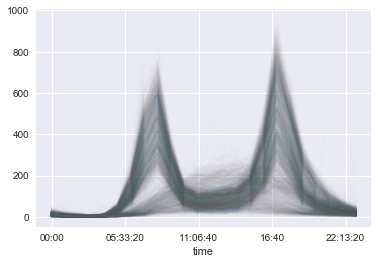

In [3]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## Principal Component Analysis

In [4]:
x = pivoted.fillna(0).T.values
x.shape

(2159, 24)

In [5]:
X2 = PCA(2, svd_solver='full').fit_transform(x)
X2.shape

(2159, 2)

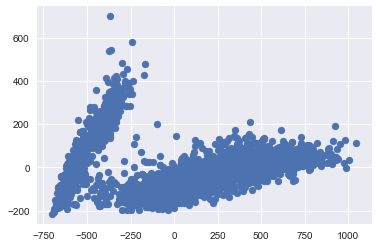

In [6]:
plt.scatter(X2[:,0], X2[:,1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2).fit(x)
labels = gmm.predict(x)

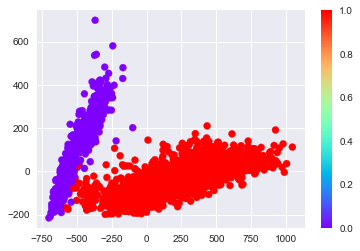

In [8]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

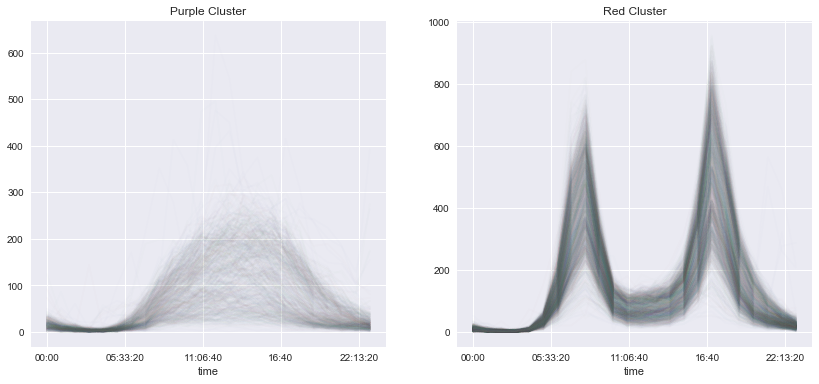

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.01, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.01, ax=ax[1]);

ax[0].set_title('Purple Cluster');
ax[1].set_title('Red Cluster');

## Comparing with Day of Week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

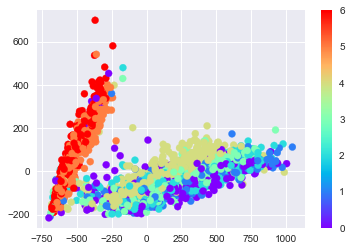

In [11]:
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers 

The following points are week days a holiday like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23',
               '2018-08-24', '2018-08-27', '2018-08-28', '2018-08-29',
               '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', length=1492, freq=None)